# 导入包

In [2]:
# coding: utf-8

#csv导入为dataframe的包
import pandas as pd
from pandas import Series, DataFrame
#导入时间和复制的包
import datetime,time
import copy

##解决在jupyter中画图不显示的问题
get_ipython().magic(u'matplotlib inline')
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
#解决中文编码的问题
import sys
defaultencoding = 'utf-8'
if sys.getdefaultencoding() != defaultencoding:
    reload(sys)
    sys.setdefaultencoding(defaultencoding)


import this

# 导入数据&数据排序&数据去重

In [2]:
data = pd.read_csv("K:/16.12.6-python/data/9.csv", low_memory = False)

In [3]:
#1、数据需要按时间重新排序
data=data.sort(["TIMESTAMP"],ascending=[1]).reset_index(drop=True)#按时间戳进行排序，ascending=1代表递增，0代表递减

In [5]:
#2、此数据中有部分数据重复，需删除；
num=[]
timestamp=data["TIMESTAMP"]
for i in range(len(data.index)-1):
    if timestamp[i]==timestamp[i+1]:#获取数据重复点的索引位置
        num.append(i)


In [6]:
len(num)

305394

In [7]:
data=data.drop(num,axis=0).reset_index(drop=True)#删掉重复的数据，只取不重复的数据

In [9]:
data

TIMESTAMP            DATIME_RX    鍖呭ご  缁堢�娑堟伅鍛戒护鍙� 缁堢�娑堟伅闀垮害  CAN缃戠粶娑堟伅鍛戒护鍙� \
0       1472347248680  2016-08-28 09:20:50  True      0.0     0.0       744.0   
1       1472347248849  2016-08-28 09:20:50  True      0.0     0.0       744.0   
2       1472347253669  2016-08-28 09:20:55  True      0.0     0.0       744.0   
3       1472347253830  2016-08-28 09:20:55  True      0.0     0.0       744.0   
4       1472347258665  2016-08-28 09:21:00  True      0.0     0.0       744.0   
5       1472347258840  2016-08-28 09:21:00  True      0.0     0.0       744.0   
6       1472347263687  2016-08-28 09:21:05  True      0.0     0.0       744.0   
7       1472347263828  2016-08-28 09:21:05  True      0.0     0.0       744.0   
8       1472347268668  2016-08-28 09:21:10  True      0.0     0.0       744.0   
9       1472347268838  2016-08-28 09:21:10  True      0.0     0.0       744.0   
10      1472347270694  2016-08-28 09:21:12  True    385.0    32.0         0.0   
11      1472347273668  2016-08-28 09:21:15  True      0.0     0.0       744.0   
12      1472347273964  2016-08-28 09:21:15  True      0.0     0.0       744.0   
13      1472347278761  2016-08-28 09:21:20  True      0.0     0.0       744.0   
14      1472347278830  2016-08-28 09:21:20  True      0.0     0.0       744.0   
15      1472347283673  2016-08-28 09:21:25  True      0.0     0.0       744.0   
16      1472347283825  2016-08-28 09:21:25  True      0.0     0.0       744.0   
17      1472347288680  2016-08-28 09:21:30  True      0.0     0.0       744.0   
18      1472347288828  2016-08-28 09:21:30  True      0.0     0.0       744.0   
19      1472347293723  2016-08-28 09:21:35  True      0.0     0.0       744.0   
20      1472347293834  2016-08-28 09:21:35  True      0.0     0.0       744.0   
21      1472347299233  2016-08-28 09:21:40  True      0.0     0.0       744.0   
22      1472347299304  2016-08-28 09:21:40  True      0.0     0.0       744.0   
23      1472347300687  2016-08-28 09:21:42  True    385.0    32.0         0.0   
24      1472347303665  2016-08-28 09:21:45  True      0.0     0.0       744.0   
25      1472347303907  2016-08-28 09:21:45  True      0.0     0.0       744.0   
26      1472347308675  2016-08-28 09:21:50  True      0.0     0.0       744.0   
27      1472347308835  2016-08-28 09:21:50  True      0.0     0.0       744.0   
28      1472347313671  2016-08-28 09:21:55  True      0.0     0.0       744.0   
29      1472347313815  2016-08-28 09:21:55  True      0.0     0.0       744.0   
...               ...                  ...   ...      ...     ...         ...   
671763  1474420778182  2016-09-21 09:19:40  True      0.0     0.0       744.0   
671764  1474420783031  2016-09-21 09:19:45  True      0.0     0.0       744.0   
671765  1474420783185  2016-09-21 09:19:45  True      0.0     0.0       744.0   
671766  1474420788023  2016-09-21 09:19:50  True      0.0     0.0       744.0   
671767  1474420788183  2016-09-21 09:19:50  True      0.0     0.0       744.0   
671768  1474420793072  2016-09-21 09:19:55  True      0.0     0.0       744.0   
671769  1474420793179  2016-09-21 09:19:55  True      0.0     0.0       744.0   
671770  1474420798016  2016-09-21 09:20:00  True      0.0     0.0       744.0   
671771  1474420798180  2016-09-21 09:20:00  True      0.0     0.0       744.0   
671772  1474420801010  2016-09-21 09:20:03  True    385.0    32.0         0.0   
671773  1474420803027  2016-09-21 09:20:05  True      0.0     0.0       744.0   
671774  1474420803200  2016-09-21 09:20:05  True      0.0     0.0       744.0   
671775  1474420808070  2016-09-21 09:20:10  True      0.0     0.0       744.0   
671776  1474420808225  2016-09-21 09:20:10  True      0.0     0.0       744.0   
671777  1474420813023  2016-09-21 09:20:15  True      0.0     0.0       744.0   
671778  1474420813177  2016-09-21 09:20:15  True      0.0     0.0       744.0   
671779  1474420818022  2016-09-21 09:20:20  True      0.0     0.0       744.0   
671780  1474420818176  2016-09-21

In [10]:
#3、验证数据是否删除完全
num=[]
timestamp=data["TIMESTAMP"]
for i in range(len(data.index)-1):
    if timestamp[i]==timestamp[i+1]:#获取数据重复点的索引位置
        num.append(i)
num

[]

# 分离三个传感器数据

In [47]:
timestamp=data["TIMESTAMP"]
terminalnum=data["终端消息命令号"]

In [ ]:
'''
传感器1（与温度、电量相关，采样间隔5s）：
运行模式、电机1状态、主继电器紧急断开、模式回馈、电机DICO状态、控制器温度、电机温度、进水温度、出水温度、出水温度传感器故障、
进水温度传感器故障、出水温度过温、进水温度过温、SOC、单体最高电压、单体最低电压、模组最高温度、模组最低温度、BMS状态、BMS绝缘状态、
总充电量、总放电量、剩余电量、后门信号、前门信号、手刹信号、气压1、气压2、续驶里程、单位电耗、总里程、转向助力指令、转向助力状态 

传感器2（与车辆运行状态有关，采样间隔5s ）：制动开关、驻车制动开关、加速踏板、油门踏板位置、制动踏板位置、启动信号、档位请求、车行方向、
当前档位、启动回馈、主继电器状态、预充继电器状态、系统一般故障、系统严重故障、电机转速、电机扭矩、速度.3 、水温、主线电压、主线电流、
软件版本、电池电压、电池电流、绝缘阻值 、急停开关状态、后舱门信号、系统就绪Ready、高压互锁、DC/AC故障、DC/DC故障

传感器3（采样间隔30s）：
终端消息命令号、终端消息长度、上报原因、里程、硬件版本号、软件版本号
'''

In [32]:
#用终端消息命令号来识别，不为0则为传感器3，为0则是传感器1、2
#用制动开关来识别，有值为传感器1，NAN则是传感器2

num1=[]#传感器1,5s采样一次
num2=[]#传感器2，5s采样一次，传感器1采样后100s开始采样
num3=[]#传感器3，30s采样一次
num4=[]#用于暂存传感器1和传感器2的值

for i in range(len(terminalnum)):    
    if terminalnum[i]==0: #先用终端消息命令号将传感器3分开
        num4.append(i)
    else:
        num3.append(i)
        
data3=data.loc[num3].reset_index(drop=True)
data4=data.loc[num4].reset_index(drop=True)

In [91]:
timestamp=data4["TIMESTAMP"]
brakeswitch=data4["制动开关"]
motorstytle=data4["电机1状态"]
num1=[]
num2=[]
for i in range(len(timestamp)-1):    
    if((timestamp[i+1]-timestamp[i])<1000):#用时间差来分离传感器1和传感器2
        if(not np.isnan(motorstytle[i])):
            num1.append(i)
    else:
        if(not np.isnan(brakeswitch[i])):
            num2.append(i)
#【注意】上面的划分方法直接牺牲了某些值（缺省值过多的值）
data1=data4.loc[num1].reset_index(drop=True)
data2=data4.loc[num2].reset_index(drop=True)

In [107]:
len(num1)

183870

In [93]:
#验证是否有错
mistake=[]
for i in range(len(num1)-1):
    if((num1[i+1]-num1[i])==1):
        mistake.append(num1[i])
        mistake.append(num1[i+1])
mistake

In [103]:
data4.loc[60261:60265,["TIMESTAMP","制动开关","电机1状态"]]
#奇葩错误的代表，一般认为传感器2有制动开关值，而无电机1状态。。。这个居然同时存在

TIMESTAMP  鍒跺姩寮�叧  鐢垫満1鐘舵�
60261  1472538006653   0.0    1.0
60262  1472538006655   0.0    1.0
60263  1472538006659   0.0    1.0
60264  1472538006662   NaN    1.0
60265  1472538006767   NaN    1.0

In [101]:
data4.loc[30991:30993,["TIMESTAMP","制动开关","电机1状态"]]

TIMESTAMP  鍒跺姩寮�叧  鐢垫満1鐘舵�
30991  1472457040787   NaN    1.0
30992  1472457041060   NaN    1.0
30993  1472457041255   NaN    1.0

In [104]:
#将分离出的传感器写入文件
data1.to_csv("K:/16.12.6-python/data/clear1.csv",index=False)
data2.to_csv("K:/16.12.6-python/data/clear2.csv",index=False)#index=false表示去掉列头
data3.to_csv("K:/16.12.6-python/data/clear3.csv",index=False)

# 分离出时间差较大的数据块并存储

In [3]:
#由于排序后索引行号仍与以前相同，data2需重新读入以校正索引行号
data2 = pd.read_csv("K:/16.12.6-python/data/clear1.csv", low_memory = False)

In [14]:
timestamp=data2["TIMESTAMP"]
date=data2["DATIME_RX"]

In [16]:
timestamp=data2["TIMESTAMP"]
date=data2["DATIME_RX"]
timedif=[]
timedifnum=[]
daterecord=[]

for i in range(len(timestamp)-1):
    if((timestamp[i+1]-timestamp[i])>1800000):  #找出时间差大于30min的点，并记录时间
        timedifnum.append(i)
        timedif.append(timestamp[i+1]-timestamp[i])
        daterecord.append(date[i])
len(timedif)

35

In [17]:
timedifnum.insert(0,0)
timedifnum.insert(len(timedifnum),len(timestamp))

In [19]:
for i in range(len(timedifnum)-1):
    addr="K:/16.12.6-python/data/data/"+str(i)+".csv"
    data2[timedifnum[i]+1:timedifnum[i+1]+1].to_csv(addr,index=False)

# 读取数据并画图

In [29]:
data3 = pd.read_csv("K:/16.12.6-python/data/data/0.csv", low_memory = False)

In [30]:
time=data3["TIMESTAMP"]
time2=[]
motor=data3["电机转速"]
speed=data3["速度"]
motor2=[]
mile=data3["总里程"]
mile2=[]
for i in range(len(time)):
    time2.append((time[i]-time[0])/60000.0)#把时间化为分钟

In [35]:
where_are_nan = np.isnan(data3["电机转速"])

In [36]:
#筛除nan值所在的时间和电机转速值
time3=[]
for i in range(len(where_are_nan)):
    if not where_are_nan[i]:
        time3.append(time2[i])
        motor2.append(motor[i])

In [31]:
where_are_nan2 = np.isnan(data3["总里程"])
#筛除nan值所在的时间和里程值
time4=[]
for i in range(len(where_are_nan2)):
    if not where_are_nan2[i]:
        if mile[i]>1000:
            time4.append(time2[i])
            mile2.append(mile[i])

In [43]:
#归一化函数
def MaxMinNormalization(x,Max,Min):  
    x = (x - Min) / (Max - Min);  
    return x;  

In [47]:
mile2=MaxMinNormalization(mile2,np.max(mile2),np.min(mile2))

In [37]:
len(motor2)

7494

In [38]:
len(time3)

7494

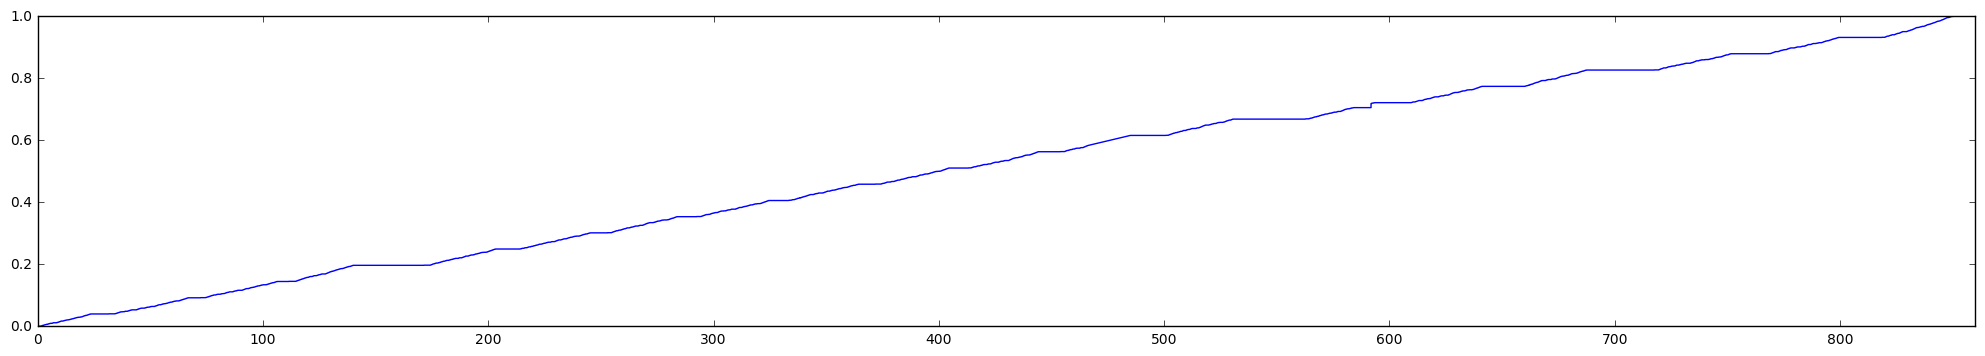

In [48]:
plt.figure(figsize=(25,4))
plt.xlim(xmax=860)
plt.plot(time4,[x for x in mile2])

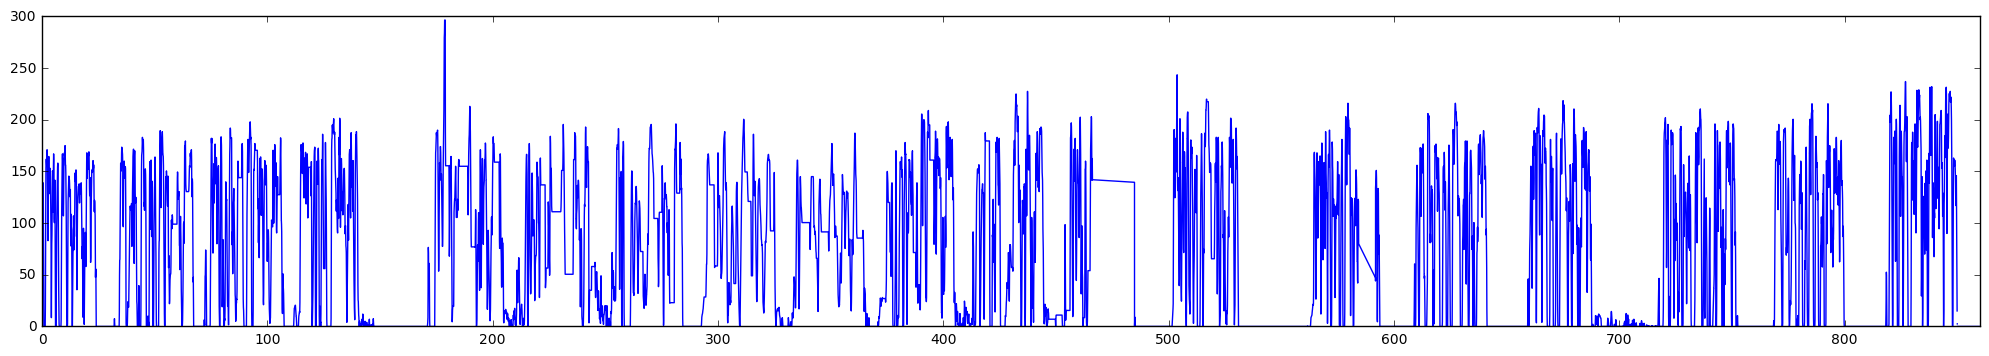

In [40]:
plt.figure(figsize=(25,4))
plt.xlim(xmax=860)
plt.plot(time2,speed)

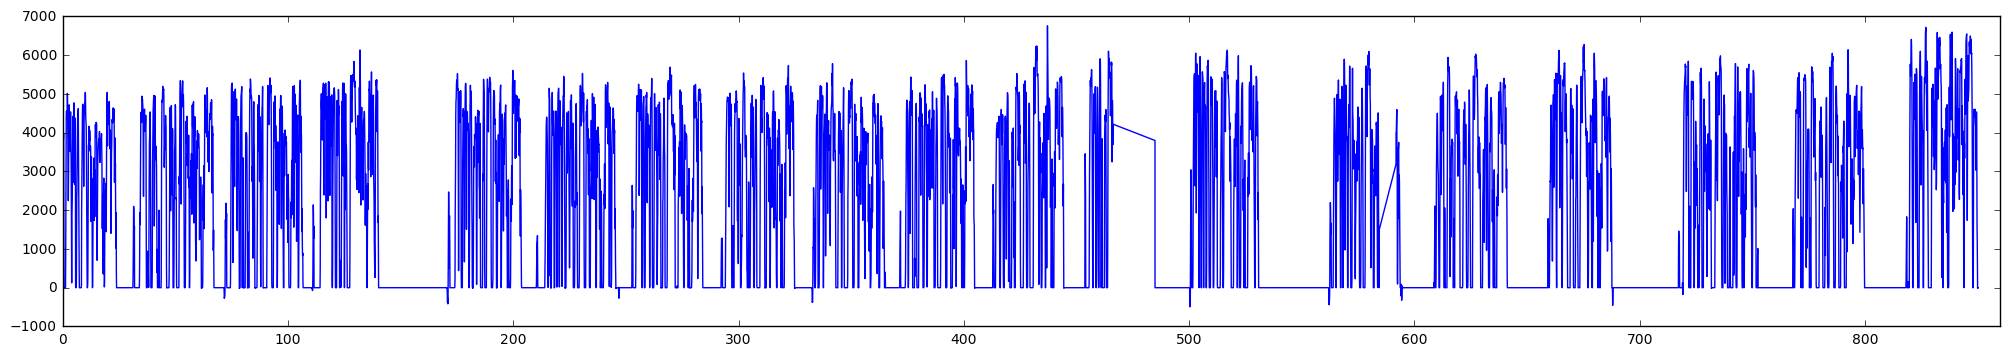

In [41]:
plt.figure(figsize=(25,4))
plt.xlim(xmax=860)
plt.plot(time3,motor2)

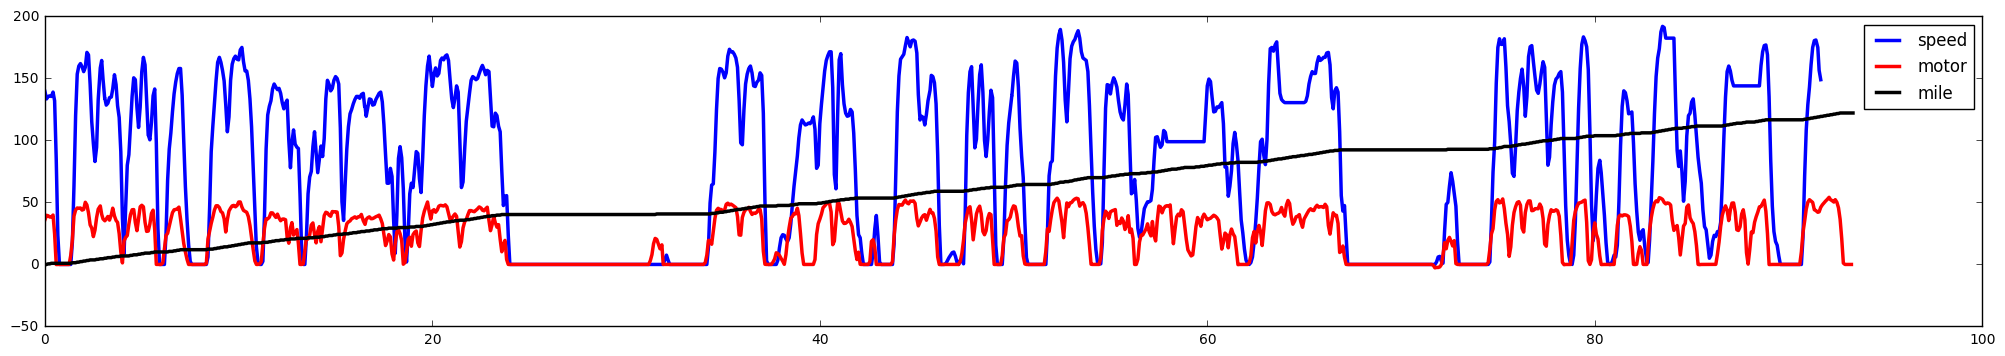

In [50]:
plt.figure(figsize=(25,4))
plt.plot(time2[0:2200],speed[0:2200], color="blue", linewidth=2.5, linestyle="-",label="speed")
plt.plot(time3[0:1000],[x/100. for x in motor2][0:1000], color="red", linewidth=2.5, linestyle="-",label="motor")
plt.plot(time4[0:1000],[x*1000. for x in mile2][0:1000], color="black", linewidth=2.5, linestyle="-",label="mile")
plt.legend(loc='upper right')

# 通过电机转速划分trip

In [10]:
#判断trip点位置
startnum=0
endnum=0
triprecord=[0]
for i in range(len(time3)-1):
    if(motor2[i]<10 and startnum==0):
        startnum=i
    elif(motor2[i]<10 and startnum!=0):
        endnum=i
        if(motor2[i+1]>10):
            if((time3[endnum]-time3[startnum])>10):
                triprecord.append(startnum)
                triprecord.append(endnum)
            else:
                startnum=0
                endnum=0           
    else:
        startnum=0
        endnum=0
triprecord.append(len(time3)-1)   
        

In [11]:
triptime=[]
for i in triprecord:
    triptime.append(time3[i])

In [33]:
triptime

[0.0,
 140.23356666666666,
 171.06251666666665,
 484.85961666666668,
 500.52379999999999,
 530.85668333333331,
 562.34945000000005,
 594.67976666666664,
 608.59508333333338,
 641.25698333333332,
 659.08851666666669,
 687.75168333333329,
 717.16444999999999,
 752.49338333333333,
 767.90790000000004,
 799.73770000000002,
 818.15290000000005,
 850.23246666666671]

In [21]:
#求data3中对应的位置
tripnum=[]
j=0
for i in range(len(time2)):
    if(time2[i]==triptime[j]):
        tripnum.append(i)
        j=j+1
        if(j>(len(triptime)-1)):
            break


In [30]:
range(len(tripnum)/2)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [32]:
#把trip生成对应csv
for i in range(len(tripnum)/2):
    addr="K:/16.12.6-python/data/trip/"+str(i)+".csv"
    data3[tripnum[2*i]:tripnum[2*i+1]].to_csv(addr,index=False)

In [72]:
"""
#新建数据框的方法
df={"num":timedifnum,"dif":timedif,"date":daterecord}
df1=pd.DataFrame(data=df)
df1
"""

In [111]:
"""
#时间函数（timestamp->UTC时间）
def timestamp2string(timeStamp):  
    try:  
        d = datetime.datetime.fromtimestamp(timeStamp/1000.0)  
        str1 = d.strftime("%Y-%m-%d %H:%M:%S.%f")  
        # 2015-08-28 16:43:37.283000'  
        return str1  
    except Exception as e:  
        print e  
        return ''
    
#调用方式（13位）    
timestamp2string(timestamp[290891])
"""

In [6]:
datetime.datetime.strptime(data2["TIMESTAMP"][0],'%Y-%m-%d %H:%M:%S.%f')

TypeError: strptime() argument 1 must be string, not numpy.int64

In [22]:
datetime.datetime.fromtimestamp(data2["TIMESTAMP"][0]/1000.0).month

8

In [24]:
datetime.datetime.fromtimestamp(data2["TIMESTAMP"][0]/1000.0).day

28

# trip对照画图

In [59]:
def timestamp2day(timestamp):
    return datetime.datetime.fromtimestamp(timestamp/1000.0).day

In [58]:
def datediv(data2):
    #这里将每一天的数据当做一个trip   
    divnum=[0]
    timestamp=data2["TIMESTAMP"]
    
    for i in range(len(timestamp) - 1):
        if(timestamp2day(timestamp[i])!=timestamp2day(timestamp[i+1])):
            divnum.append(i)
            divnum.append(i+1) 
    divnum.append(len(timestamp) - 1)

    return divnum


In [ ]:
    for i in range(len(divnum)/2):
        trip_time = data2[divnum[2*i]:divnum[2*i+1]]["速度"]
        trip_speed = data2[divnum[2*i]:divnum[2*i+1]]["速度"]
        for j in range(divnum[2*0+1]-divnum[2*0]+1):
            trip_num.append(i)

In [73]:
# 定义一个函数，画出每一天所有trip的速度图, 分开画
def vel_sub_plot(data2,divnum):
    plt.figure(figsize = (60,60))
    i = 0
    num=len(divnum)/2
    while i < num:
        plt.subplot(num,1,i+1)
        plt.plot(data2[divnum[2*i]:divnum[2*i+1]]["TIMESTAMP"],data2[divnum[2*i]:divnum[2*i+1]]["速度"], label = 'trip {i}'.format(i=i))
        i = i + 1
        plt.legend(loc = 'best')

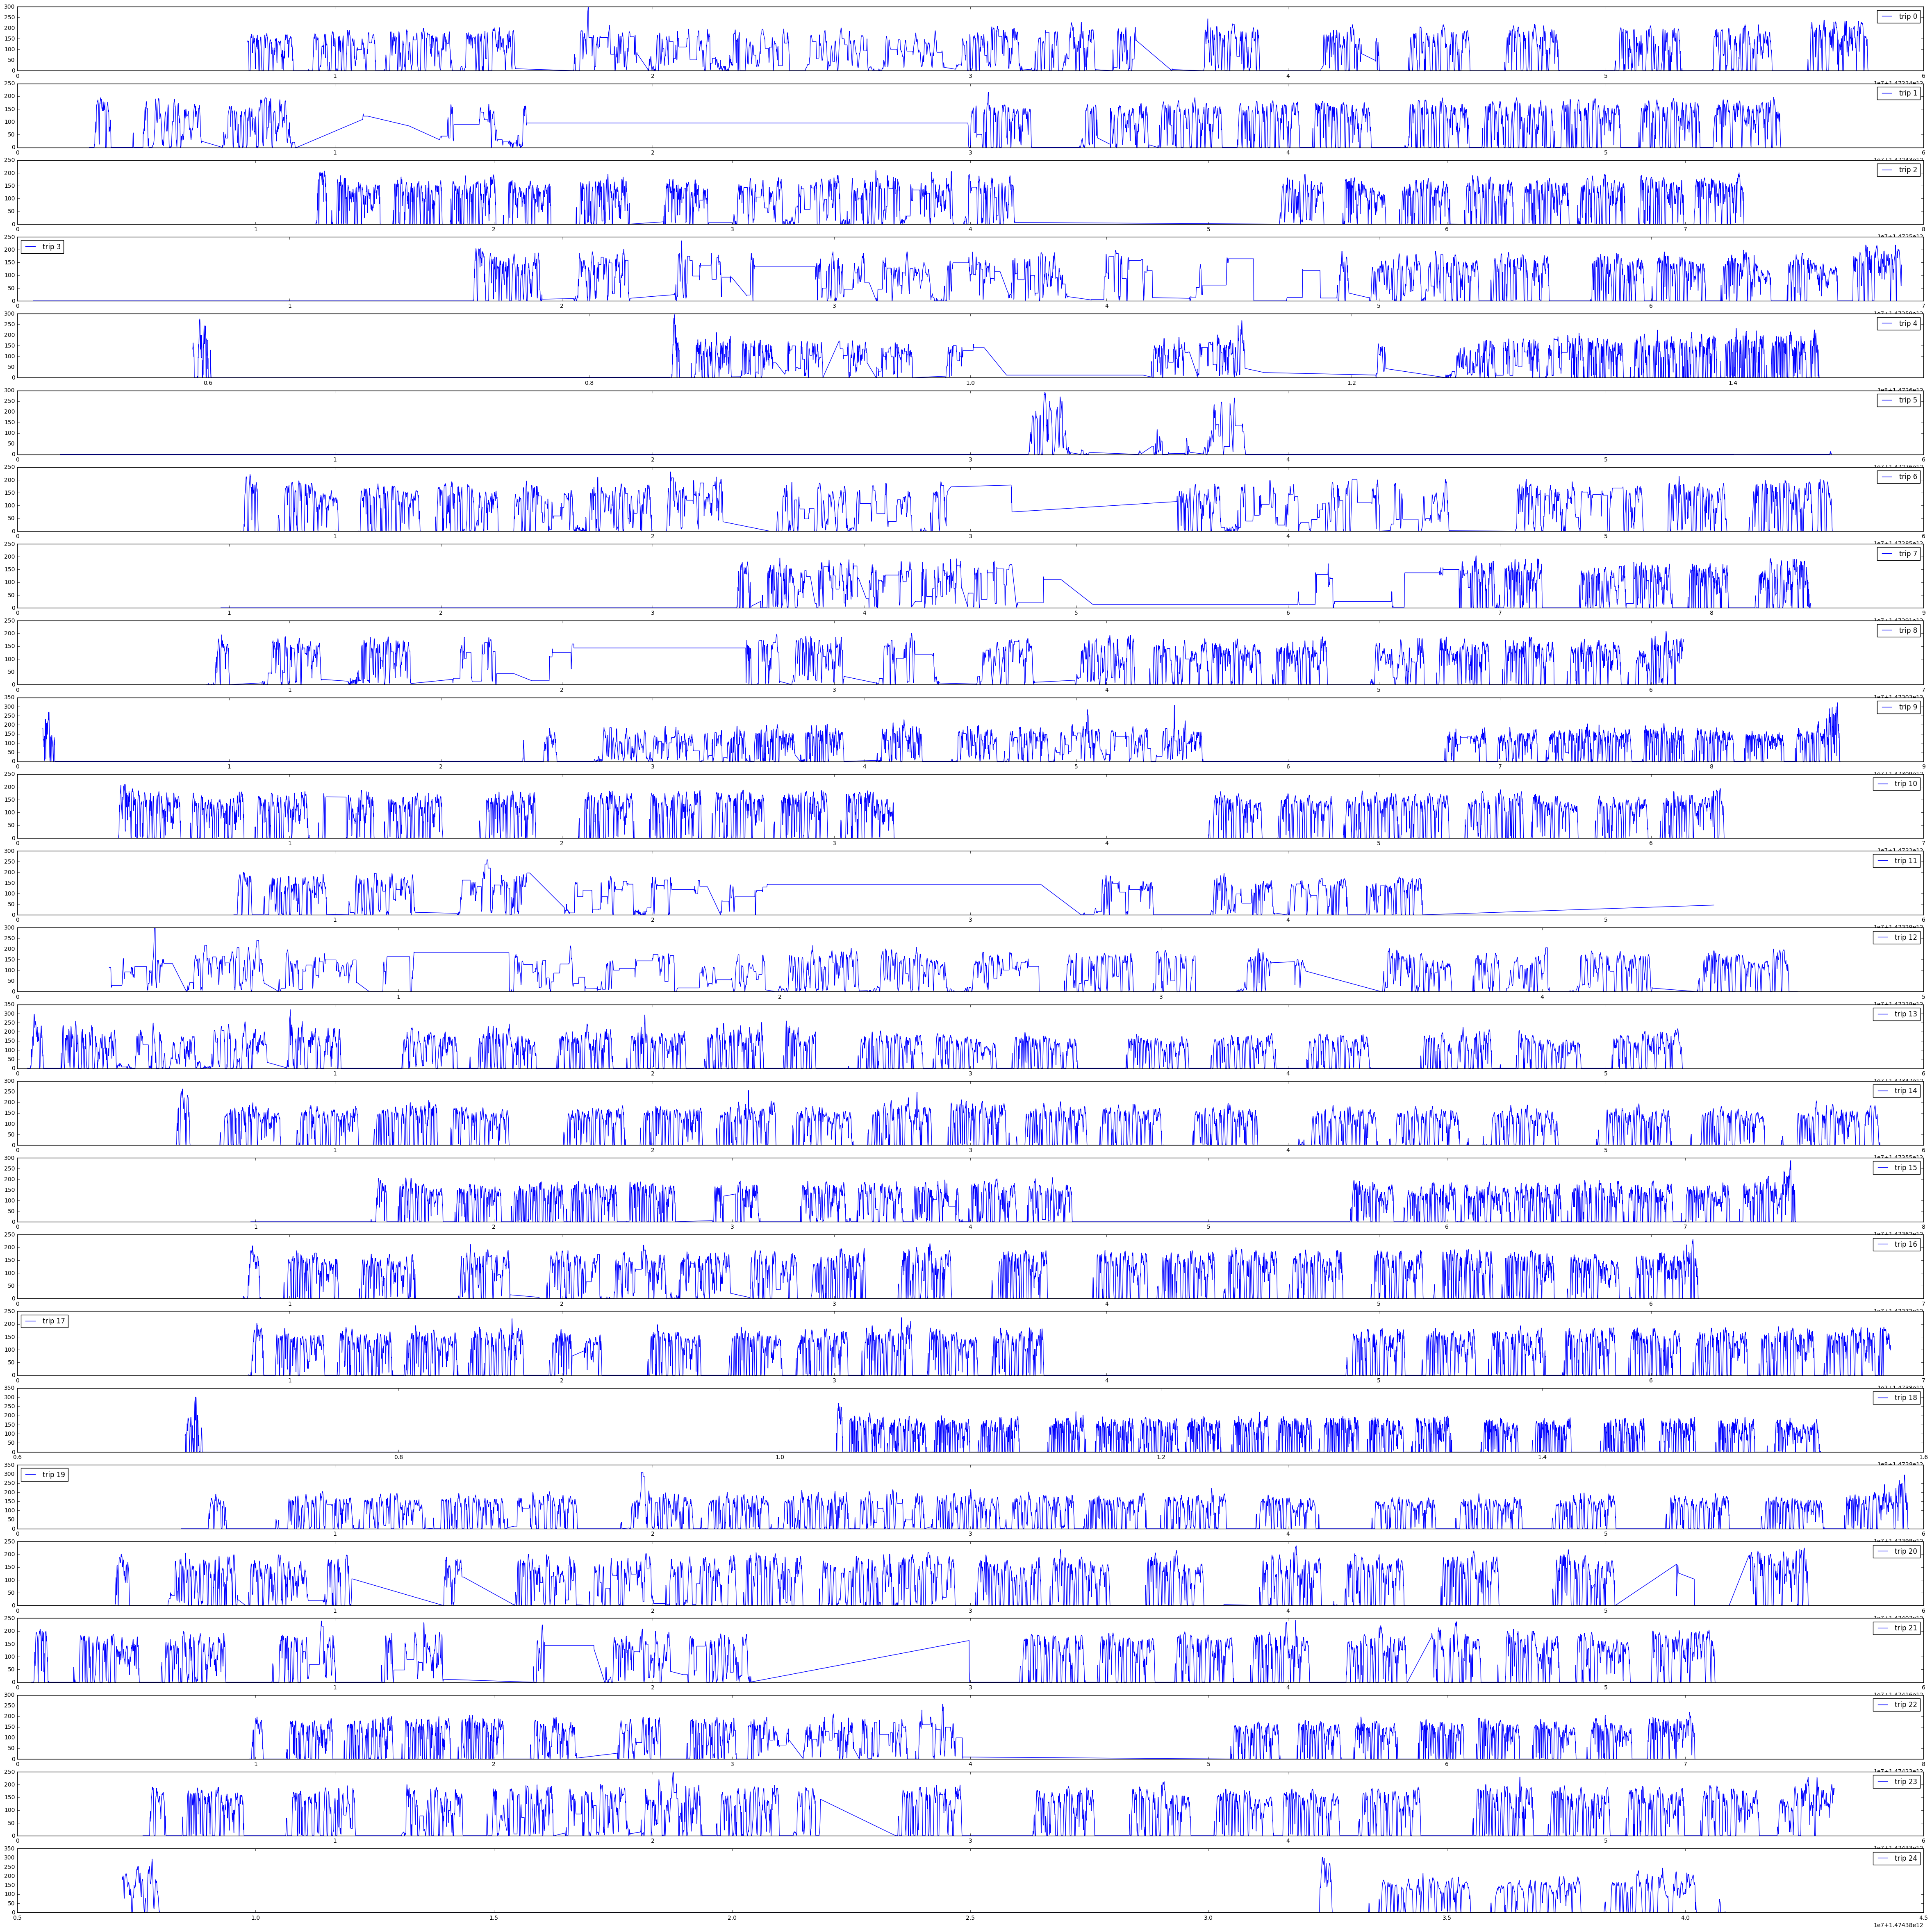

In [74]:
vel_sub_plot(data2,datediv(data2))